Гистограммы распределения признаков
Seaborn — графическая библиотека с большими функциональными возможностями, позволяющая создавать разные типы графиков и использовать расширенные настройки при оформлении. Многие функции Seaborn интегрируются с библиотекой Matplotlib, что создает дополнительные возможности для творчества при визуализации данных.

Импортируем библиотеки Seaborn, Matplotlib и Pandas для работы с датафреймами и корректного отображения информации в jupyter notebook:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

При использовании некоторых методов Seaborn система может выдавать предупреждающие сообщения, что метод применяется к определенному типу данных. Эти предупреждения не являются сообщениями об ошибках, их можно игнорировать и отключить выведение на экран:

In [3]:
import warnings; warnings.simplefilter('ignore')

Загружаем датасет tips.csv, с которым мы будем работать:

In [3]:
df = pd.read_csv('tips.csv')

NameError: name 'pd' is not defined

Для построения гистограммы распределения количественных признаков в библиотеке Seaborn используется метод distplot. Перед применением метода установим стандартные параметры отображения графиков с помощью команды sns.set():

<AxesSubplot:xlabel='total_bill'>

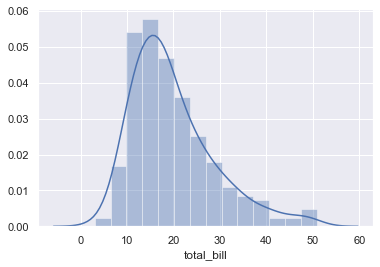

In [5]:
sns.set()
sns.distplot(df['total_bill'])

Seaborn позволяет разместить на одном графике гистограммы распределения двух признаков и показать связь между ними. Тип графика, используемый для этого, называется jointplot:

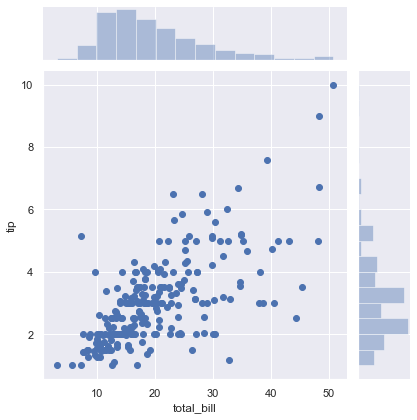

In [21]:
sns.jointplot(x = 'total_bill', y = 'tip', data = df)

Характер представления информации в центральной части графика можно регулировать с помощью параметра kind. Например, kind = 'reg' выводит на экран не только точки, представляющие данные об отдельных посещениях ресторана, но и линию регрессии, выражающую общий характер связи между двумя величинами:

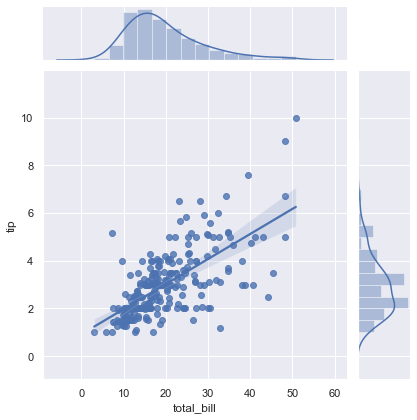

In [6]:
sns.jointplot(x='total_bill', y='tip', data = df, kind = 'reg')

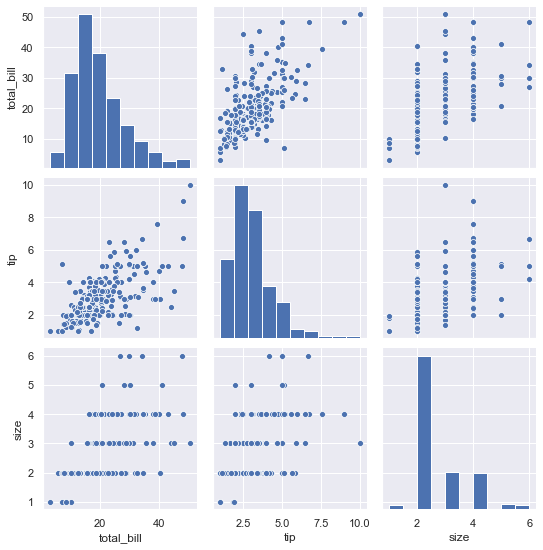

In [7]:
sns.pairplot(df)

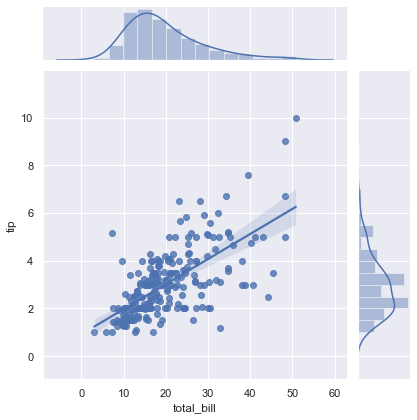

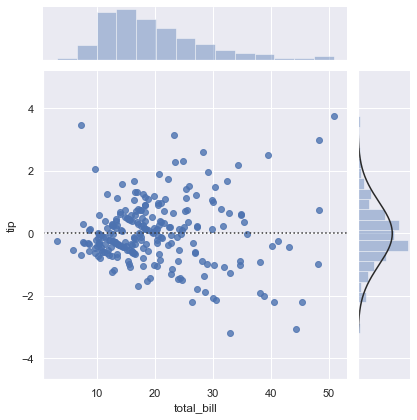

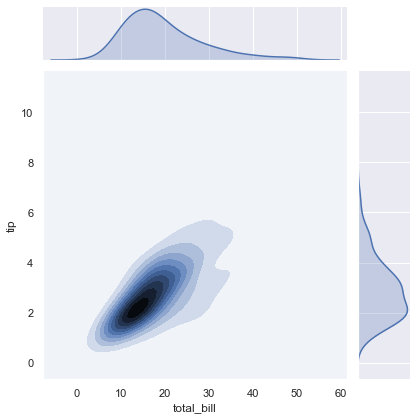

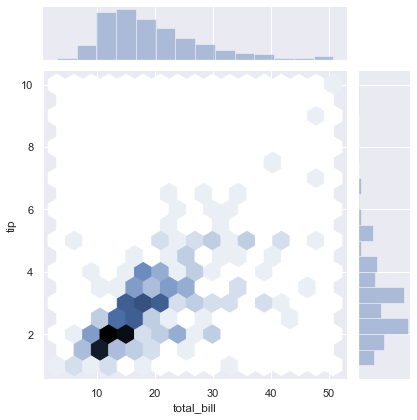

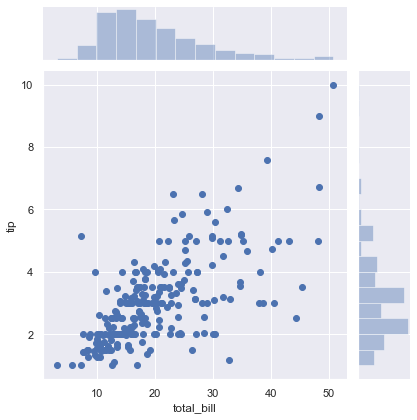

In [22]:
sns.jointplot(x='total_bill', y='tip', data = df, kind = 'reg')
sns.jointplot(x='total_bill', y='tip', data = df, kind = 'resid')
sns.jointplot(x='total_bill', y='tip', data = df, kind = 'kde')
sns.jointplot(x='total_bill', y='tip', data = df, kind = 'hex')
sns.jointplot(x='total_bill', y='tip', data = df, kind = 'scatter')

10.10 Работа с категориальными признаками

Работа с категориальными признаками
Для отображения информации о качественных признаках на диаграммах по методам библиотек Pandas и Matplotlib приходится предварительно обрабатывать датафрейм, группируя нужные данные. В Seaborn такой проблемы нет: при построении графиков можно обращаться к столбцам с категориальными признаками напрямую. Для построения гистограммы распределения категориального признака можно воспользоваться методом countplot:

<AxesSubplot:xlabel='day', ylabel='count'>

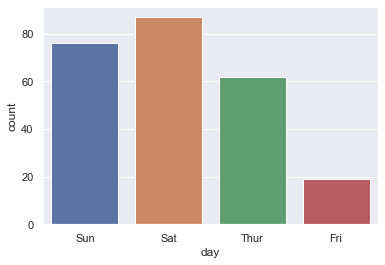

In [9]:
sns.countplot(x='day', data=df)

Категориальные значения при построении графиков можно использовать в качестве одного из параметров метода barplot. Он позволяет разделить датафрейм на группы в зависимости от значения категориальной переменной. По умолчанию для каждой группы вычисляется среднее значение заданной количественной переменной. Вместо среднего значения можно вычислить и любую другую статистическую характеристику, наименование которой задается в параметре estimator.

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

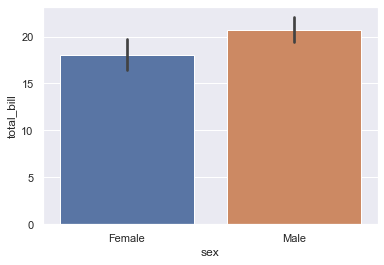

In [10]:
sns.barplot(x= 'sex',y='total_bill',data=df)

График показывает, что средний чек, оплаченный клиентами-мужчинами, немного больше, чем средний чек клиентов женского пола.

Boxplots
Box plot — тип графика, компонентами которого являются:

Отрезок (Range), отражающий диапазон значений набора данных.
Прямоугольник (Box), который отображает границы основного объема данных. Левой границей считается значение 25%-ый квантиля, или Q1, первый квартал. Правой границей является 75%-ый квантиль, или Q3, третий квартал.
Усы (whiskers) — отметки на оси, представляющие левый и правый «крайние» значения данных. Фактически эти значения не всегда являются минимумом или максимумом набора. Они представляют значения, отстоящие на 1.5*IQR влево или вправо от левой (Q1) или правой (Q2) границы соответственно. Здесь IQR - Interquartile Range (межквантильный диапазон) — ширина прямоугольника от Q1 до Q3.
Выбросы (Outliers) — значения, находящиеся за левым и правым «крайними» значениями на оси.

Для создания графиков такого типа в Seaborn используется метод boxplot. Он позволяет отобразить распределение заданного количественного признака по категориям, которые определяются значением заданного качественного признака. На диаграмме ниже показывается, как менялась сумма чаевых в зависимости от дня недели:



In [2]:
sns.boxplot(x= 'day',y='tip',data=df)

NameError: name 'sns' is not defined

<AxesSubplot:xlabel='day', ylabel='tip'>

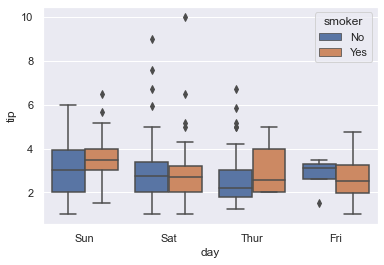

In [13]:
sns.boxplot(x= 'day',y='tip',data=df,hue='smoker')

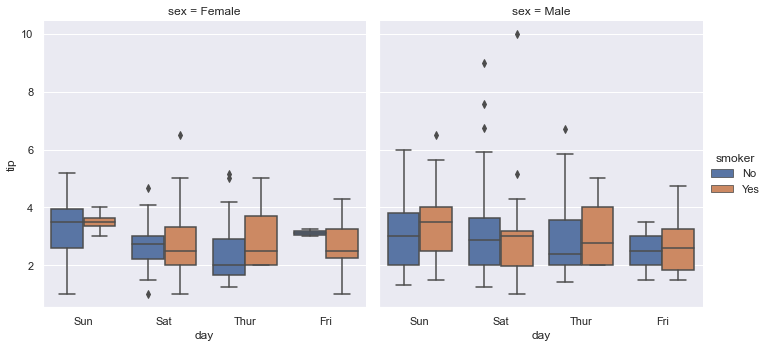

In [23]:
sns.catplot(x="day", y="tip",
                hue="smoker", col="sex",
                data=df, kind="box")

Задание 1
1/1 point (graded)
Какой тип графика используется для построения гистограммы распределения категориальных признаков?
sns.distplot()
sns.pairplot()
sns.countplot() верно
sns.jointplot()


Задание 2
1/1 point (graded)
Что станет результатом выполнения кода sns.pairplot(df, hue = 'smoker')?
Сообщение об ошибке
Построение гистограммы распределения клиентов по отношению к курению
Построение графиков, на каждом из которых разными цветами выделяются данные о курящих и некурящих  верно 

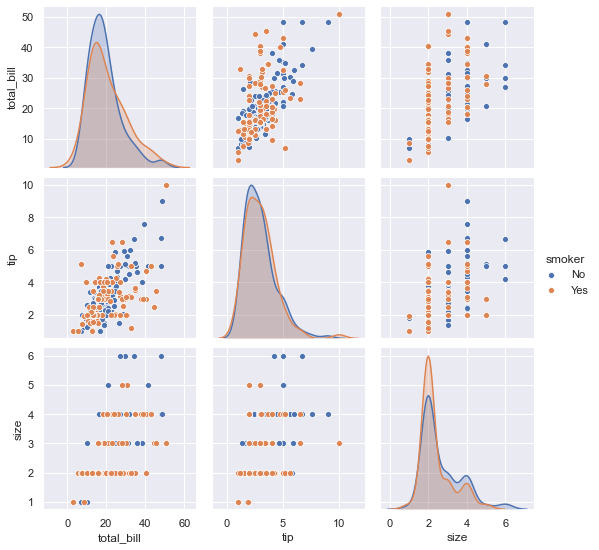

In [24]:
sns.pairplot(df, hue = 'smoker')

10.11 Графики табличного типа

Графики табличного типа
Степень связи между двумя величинами в Seaborn помогает оценить корреляционный анализ. Величина степени связи (коэффициент корреляции) может меняться от -1 до +1: чем ближе абсолютное значение коэффициента к единице, тем сильнее связь между признаками.

Для отображения информации о результатах корреляционного анализа в Seaborn часто используются тепловые карты (heatmap).  Рассмотрим, как создать такую карту. Сначала вычислим коэффициенты корреляции между количественными признаками, содержащимися в датафрейме, с помощью метода corr(). Результат вычислений сохраним в новом датафрейме correlation:



In [28]:
correlation = df.corr()
correlation



,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


Теперь мы можем передать созданный датафрейм с коэффициентами в качестве одного из параметров метода heatmap. Для отображения в тепловой карте значений коэффициентов корреляции зададим параметр annot = True. Для использования более ярких цветов при заливке ячеек применяем цветовую палитру coolwarm (параметр cmap):

<AxesSubplot:>

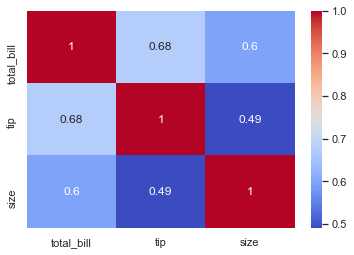

In [29]:
sns.heatmap(correlation, annot=True,cmap='coolwarm')

10.12 О библиотеке

Библиотека Plotly
Библиотека Plotly является коммерческим продуктом с бесплатной версией. С помощью этой библиотеки можно делать сложные визуализации с элементами управления. Например, отображать 3D диаграмму с выбором опций:

Мы дадим общий обзор основных возможностей библиотеки, а при необходимости вы сможете освоить более продвинутые функции под свои рабочие задачи.
Библиотека Plotly не входит в стандартный набор модулей Anaconda, поэтому ее следует установить. Это можно сделать с помощью менеджера пакетов pip, который запускается из командной строки или напрямую из jupyter notebook. В случае запуска менеджера пакетов из ячейки jupyter notebook перед текстом команды нужно добавить восклицательный знак.
Введите в свободную ячейку jupyter notebook команду:

In [30]:
!pip install plotly

     |████████████████████████████████| 13.0 MB 7.6 MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11430 sha256=a40a8779de4ff0e2407873c56c2a7b04030422f2f1c545cc1895b67d9997e4ac
  Stored in directory: /home/ssmd/.cache/pip/wheels/c4/a7/48/0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


In [32]:
!pip install cufflinks